# <font color='black'> Auto Insurance Fraud Detection</font>

## Table of Contents
    
6. [Classification Models](#f_ID)

    6.1 [Logistic Regression](#f1_ID)
    
    6.2 [Decision Tree](#f2_ID)
    
    6.3 [Naive Bayes](#f3_ID)
    
    6.4 [k-Nearest Neighbours (KNN)](#f4_ID)
    
    6.5 [Random Forest](#f5_ID)
    
    6.6 [Support Vector Machine (SVM)](#f6_ID)
   
    6.7 [Multilayer Perceptron (MLP)](#f7_ID)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <a id='f_ID'> 6. Classification Models </a>

Logistic Regression, Decision Tree, Naive Bayes, k-Nearest Neighbours (KNN), Random Forest, Support Vector Machine (SVM), and Multilayer Perceptron (MLP) classification models were trained and evaluated to predict the 'fraud_reported' class variable.

### <a id='f1_ID'> 6.1 Logistic Regression </a>

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

#### With RFE

In [128]:
logit_rfe = LogisticRegression(random_state = 123)

In [129]:
# Fit the model
logit_rfe.fit(X_train_rfe, y_train_smote) # default solver='lbfgs'

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [130]:
# Accuracy
print(cross_val_score(logit_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.7367924528301887


In [131]:
# Precision
print(cross_val_score(logit_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.7252417369462305


In [132]:
# Recall
print(cross_val_score(logit_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.7641509433962265


In [133]:
# F1 Score
print(cross_val_score(logit_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.7433850491423354


In [134]:
# AUC
print(cross_val_score(logit_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7925952296190816


##### Predictions on Test Set

In [135]:
y_pred_rfe = logit_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], d

##### Confusion Matrix

In [136]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[163  60]
 [ 22  55]]


In [137]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[163,  60],
       [ 22,  55]], dtype=int64)

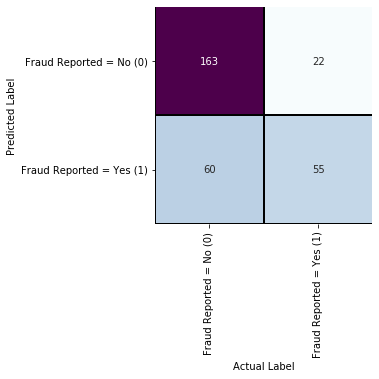

In [138]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [139]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 55
True Negative: 163
False Positive: 60
False Negative: 22


##### Evaluation of Model

In [140]:
# Classification Accuracy
##print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.7266666666666667


In [143]:
# Classification Error
##print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.2733333333333333


In [144]:
# Precision
##print(TP / float(TP + FP))
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.4782608695652174


In [145]:
# Recall (or Sensitivity)
##print(TP / float(TP + FN))
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.7142857142857143


In [146]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5729166666666667


In [147]:
# Specificity
print(TN / float(TN + FP))

0.7309417040358744


In [148]:
# False Positive Rate
print(FP / float(TN + FP))

0.26905829596412556


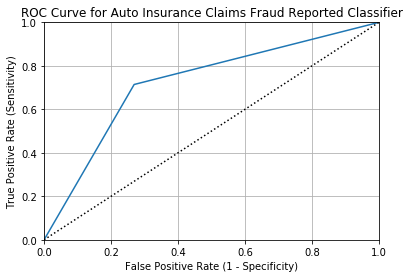

In [149]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [150]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.7226137091607945


In [151]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.88      0.73      0.80       223
Fraud Reported = Yes (1)       0.48      0.71      0.57        77

             avg / total       0.78      0.73      0.74       300



#### With PCA

In [155]:
logit_pca = LogisticRegression(random_state = 123)

In [156]:
# Fit the model
logit_pca.fit(X_train_pca, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [157]:
# Accuracy
print(cross_val_score(logit_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.7009433962264151


In [158]:
# Precision
print(cross_val_score(logit_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.6928267008181029


In [159]:
# Recall
print(cross_val_score(logit_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.7301886792452831


In [160]:
# F1 Score
print(cross_val_score(logit_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.7094476879029156


In [161]:
# AUC
print(cross_val_score(logit_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7428978284086862


##### Predictions on Test Set

In [162]:
y_pred_pca = logit_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], d

##### Confusion Matrix

In [163]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[146  77]
 [ 35  42]]


In [164]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[146,  77],
       [ 35,  42]], dtype=int64)

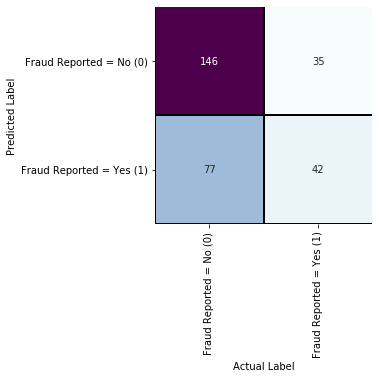

In [165]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [166]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 42
True Negative: 146
False Positive: 77
False Negative: 35


##### Evaluation of Model

In [167]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.6266666666666667


In [170]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.3733333333333333


In [171]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.35294117647058826


In [172]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.5454545454545454


In [173]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.42857142857142855


In [174]:
# Specificity
print(TN / float(TN + FP))

0.6547085201793722


In [175]:
# False Positive Rate
print(FP / float(TN + FP))

0.3452914798206278


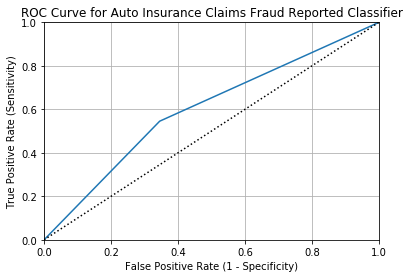

In [176]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [177]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.6000815328169589


In [178]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.81      0.65      0.72       223
Fraud Reported = Yes (1)       0.35      0.55      0.43        77

             avg / total       0.69      0.63      0.65       300



#### Without RFE or PCA

In [179]:
logit = LogisticRegression(random_state = 123)

In [180]:
# Fit the model
logit.fit(X_train_sc_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [181]:
# Accuracy
print(cross_val_score(logit, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.7311320754716981


In [182]:
# Precision
print(cross_val_score(logit, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.7229379578490387


In [183]:
# Recall
print(cross_val_score(logit, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.7490566037735851


In [184]:
# F1 Score
print(cross_val_score(logit, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.7346267101711769


In [185]:
# AUC
print(cross_val_score(logit, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7753292986828053


##### Predictions on Test Set

In [186]:
y_pred = logit.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], d

##### Confusion Matrix

In [187]:
print(metrics.confusion_matrix(y_test, y_pred))

[[158  65]
 [ 23  54]]


In [188]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[158,  65],
       [ 23,  54]], dtype=int64)

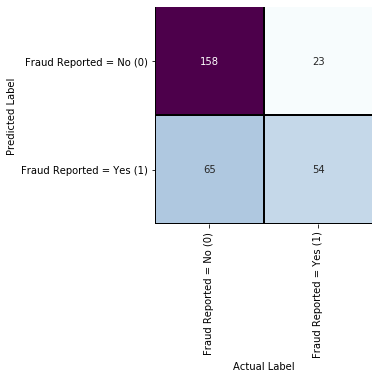

In [189]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [190]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 54
True Negative: 158
False Positive: 65
False Negative: 23


##### Evaluation of Model

In [191]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7066666666666667


In [194]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.29333333333333333


In [195]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.453781512605042


In [196]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.7012987012987013


In [197]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5510204081632653


In [198]:
# Specificity
print(TN / float(TN + FP))

0.7085201793721974


In [199]:
# False Positive Rate
print(FP / float(TN + FP))

0.2914798206278027


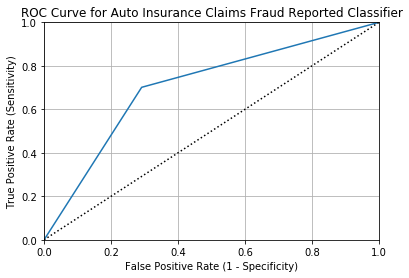

In [200]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [201]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.7049094403354493


In [202]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.88      0.73      0.80       223
Fraud Reported = Yes (1)       0.48      0.71      0.57        77

             avg / total       0.78      0.73      0.74       300



### <a id='f2_ID'> 6.2 Decision Tree </a> 

The Decision Tree model was built using the Gini index criterion.

In [86]:
from sklearn.tree import DecisionTreeClassifier

#### With RFE

In [87]:
dtree_rfe = DecisionTreeClassifier(random_state=123)

In [88]:
# Fit the model
dtree_rfe.fit(X_train_rfe, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

##### Cross-Validation Scores for Training Set

In [95]:
# Accuracy
print(cross_val_score(dtree_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.8547169811320755


In [96]:
# Precision
print(cross_val_score(dtree_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.8587863677073493


In [97]:
# Recall
print(cross_val_score(dtree_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.850943396226415


In [98]:
# F1 Score
print(cross_val_score(dtree_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.8494214077922402


In [99]:
# AUC
print(cross_val_score(dtree_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.8547169811320755


##### Predictions on Test Set

In [211]:
y_pred_rfe = dtree_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], d

##### Confusion Matrix

In [212]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[195  28]
 [ 33  44]]


In [213]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[195,  28],
       [ 33,  44]], dtype=int64)

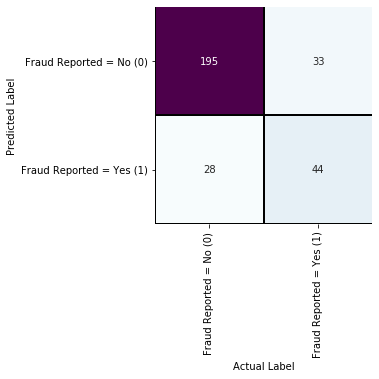

In [214]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [215]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 44
True Negative: 195
False Positive: 28
False Negative: 33


##### Evaluation of Model

In [216]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.7966666666666666


In [219]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.20333333333333337


In [220]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.6111111111111112


In [221]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.5714285714285714


In [222]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5906040268456376


In [223]:
# Specificity
print(TN / float(TN + FP))

0.874439461883408


In [224]:
# False Positive Rate
print(FP / float(TN + FP))

0.12556053811659193


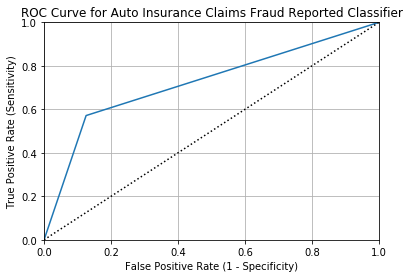

In [225]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [226]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.7229340166559897


In [227]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.86      0.87      0.86       223
Fraud Reported = Yes (1)       0.61      0.57      0.59        77

             avg / total       0.79      0.80      0.79       300



In [100]:
import graphviz
from sklearn import tree

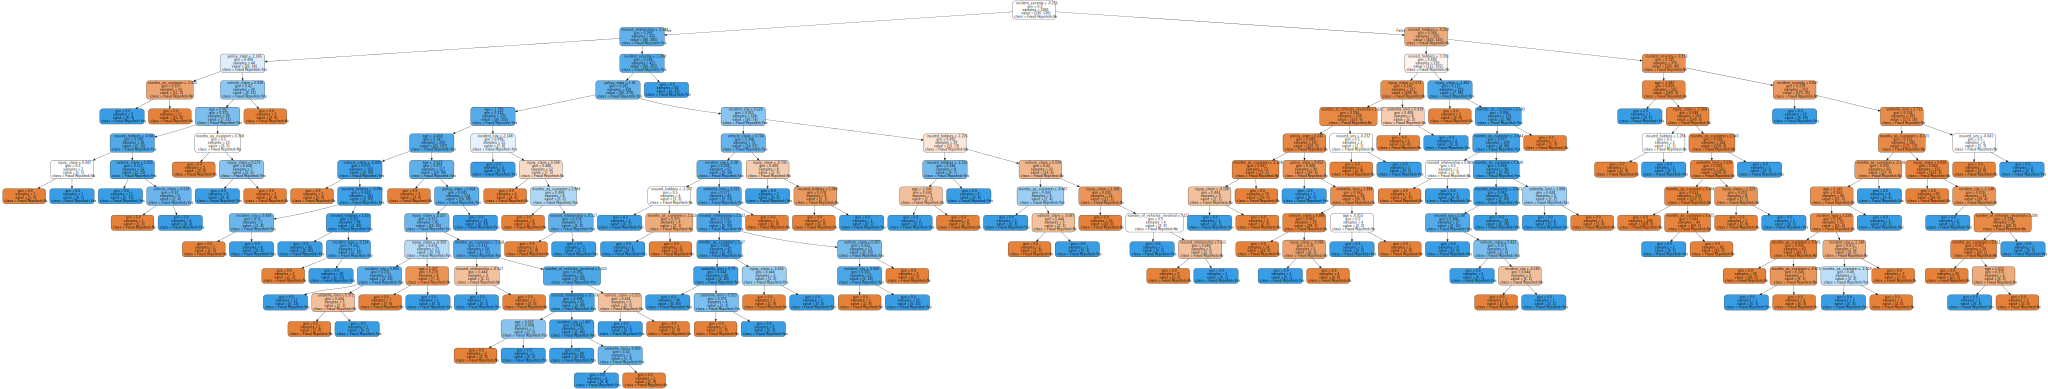

In [101]:
data = tree.export_graphviz(dtree_rfe, out_file=None, feature_names=X_train.columns[list(rfecv.support_)], 
                            class_names=['Fraud Reported=No', 'Fraud Reported=Yes'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

#### With PCA

In [102]:
dtree_pca = DecisionTreeClassifier(random_state=123)

In [103]:
# Fit the model
dtree_pca.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

##### Cross-Validation Scores for Training Set

In [230]:
# Accuracy
print(cross_val_score(dtree_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.7226415094339622


In [231]:
# Precision
print(cross_val_score(dtree_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.7050191044104267


In [232]:
# Recall
print(cross_val_score(dtree_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.7679245283018867


In [233]:
# F1 Score
print(cross_val_score(dtree_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.7337247201060157


In [234]:
# AUC
print(cross_val_score(dtree_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7226415094339623


##### Predictions on Test Set

In [235]:
y_pred_pca = dtree_pca.predict(X_test_pca)
y_pred_pca

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], d

##### Confusion Matrix

In [236]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[159  64]
 [ 48  29]]


In [237]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[159,  64],
       [ 48,  29]], dtype=int64)

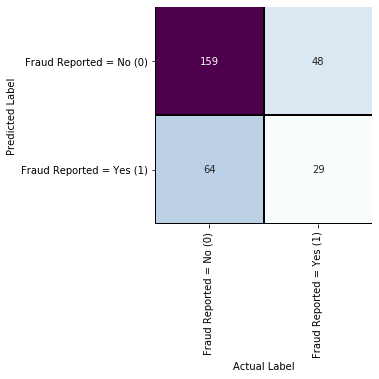

In [238]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [390]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 29
True Negative: 159
False Positive: 64
False Negative: 159


##### Evaluation of Model

In [239]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.6266666666666667


In [240]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.3733333333333333


In [241]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.3118279569892473


In [242]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.37662337662337664


In [243]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.3411764705882353


In [244]:
# Specificity
print(TN / float(TN + FP))

0.874439461883408


In [245]:
# False Positive Rate
print(FP / float(TN + FP))

0.12556053811659193


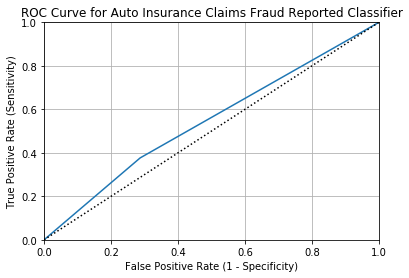

In [246]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [247]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.5448139304641547


In [248]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.77      0.71      0.74       223
Fraud Reported = Yes (1)       0.31      0.38      0.34        77

             avg / total       0.65      0.63      0.64       300



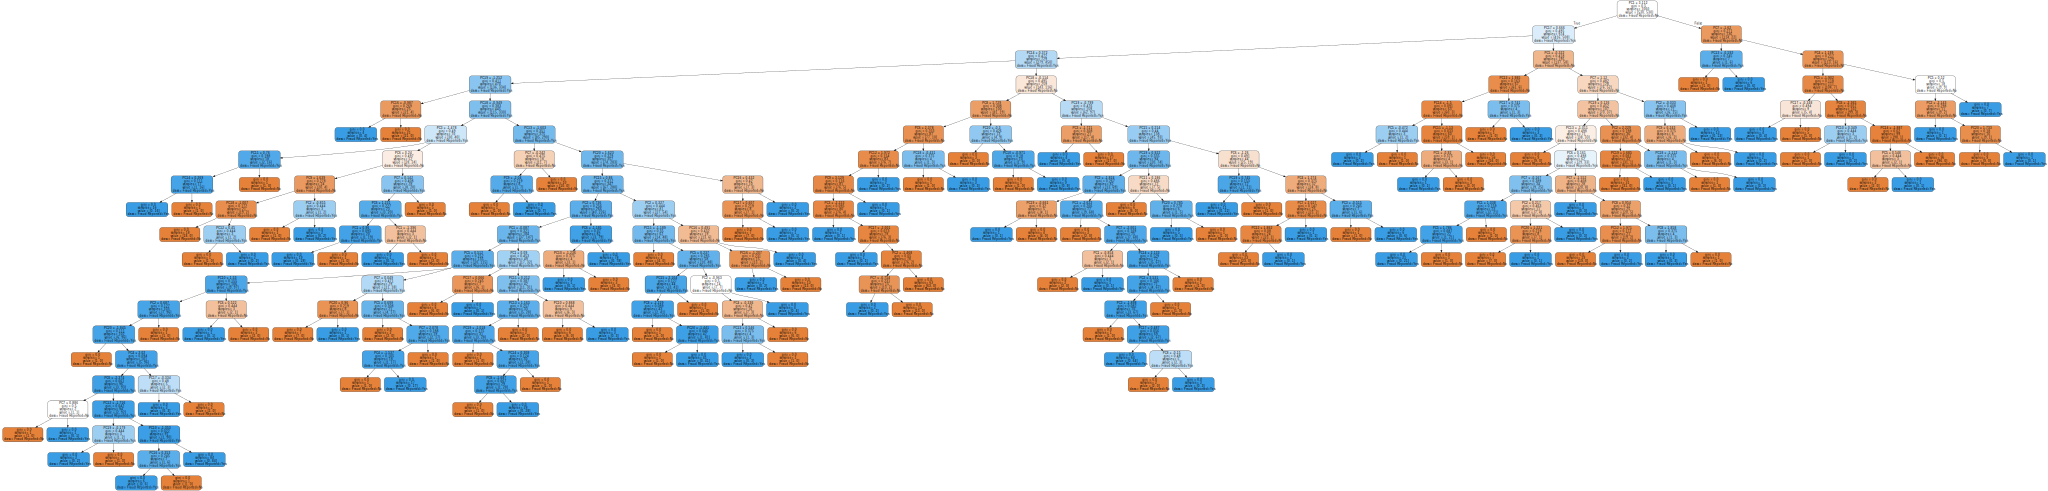

In [104]:
data = tree.export_graphviz(dtree_pca, out_file=None, feature_names=['PC1', 'PC2', 'PC3' ,'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
                                                                     'PC9','PC10','PC11', 'PC12', 'PC13' ,'PC14', 'PC15',
                                                                     'PC16', 'PC17', 'PC18', 'PC19','PC20'],
                            class_names=['Fraud Reported=No', 'Fraud Reported=Yes'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

#### Without RFE or PCA

In [105]:
dtree = DecisionTreeClassifier(random_state=123)

In [106]:
# Fit the model
dtree.fit(X_train_sc_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

##### Cross-Validation Scores for Training Set

In [251]:
# Accuracy
print(cross_val_score(dtree, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.8547169811320755


In [252]:
# Precision
print(cross_val_score(dtree, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.8448592525543208


In [253]:
# Recall
print(cross_val_score(dtree, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.8679245283018868


In [254]:
# F1 Score
print(cross_val_score(dtree, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.8518876962466372


In [255]:
# AUC
print(cross_val_score(dtree, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.8547169811320753


##### Predictions on Test Set

In [257]:
y_pred = dtree.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], d

##### Confusion Matrix

In [258]:
print(metrics.confusion_matrix(y_test, y_pred))

[[199  24]
 [ 32  45]]


In [259]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[199,  24],
       [ 32,  45]], dtype=int64)

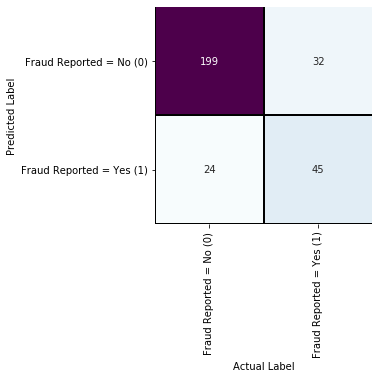

In [260]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [261]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 45
True Negative: 199
False Positive: 24
False Negative: 32


##### Evaluation of Model

In [262]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.8133333333333334


In [263]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.18666666666666665


In [264]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.6521739130434783


In [265]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.5844155844155844


In [266]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.6164383561643835


In [267]:
# Specificity
print(TN / float(TN + FP))

0.8923766816143498


In [268]:
# False Positive Rate
print(FP / float(TN + FP))

0.10762331838565023


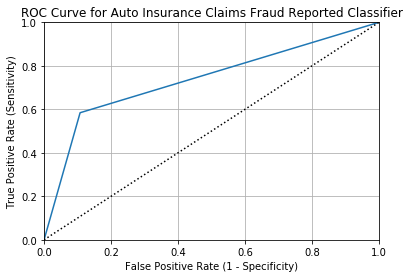

In [269]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [270]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.7383961330149671


In [271]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.86      0.87      0.86       223
Fraud Reported = Yes (1)       0.61      0.57      0.59        77

             avg / total       0.79      0.80      0.79       300



Looking at the ROC and AUC, Decision Tree model better performed using the training set without RFE or PCA, then using RFE and least well using PCA.

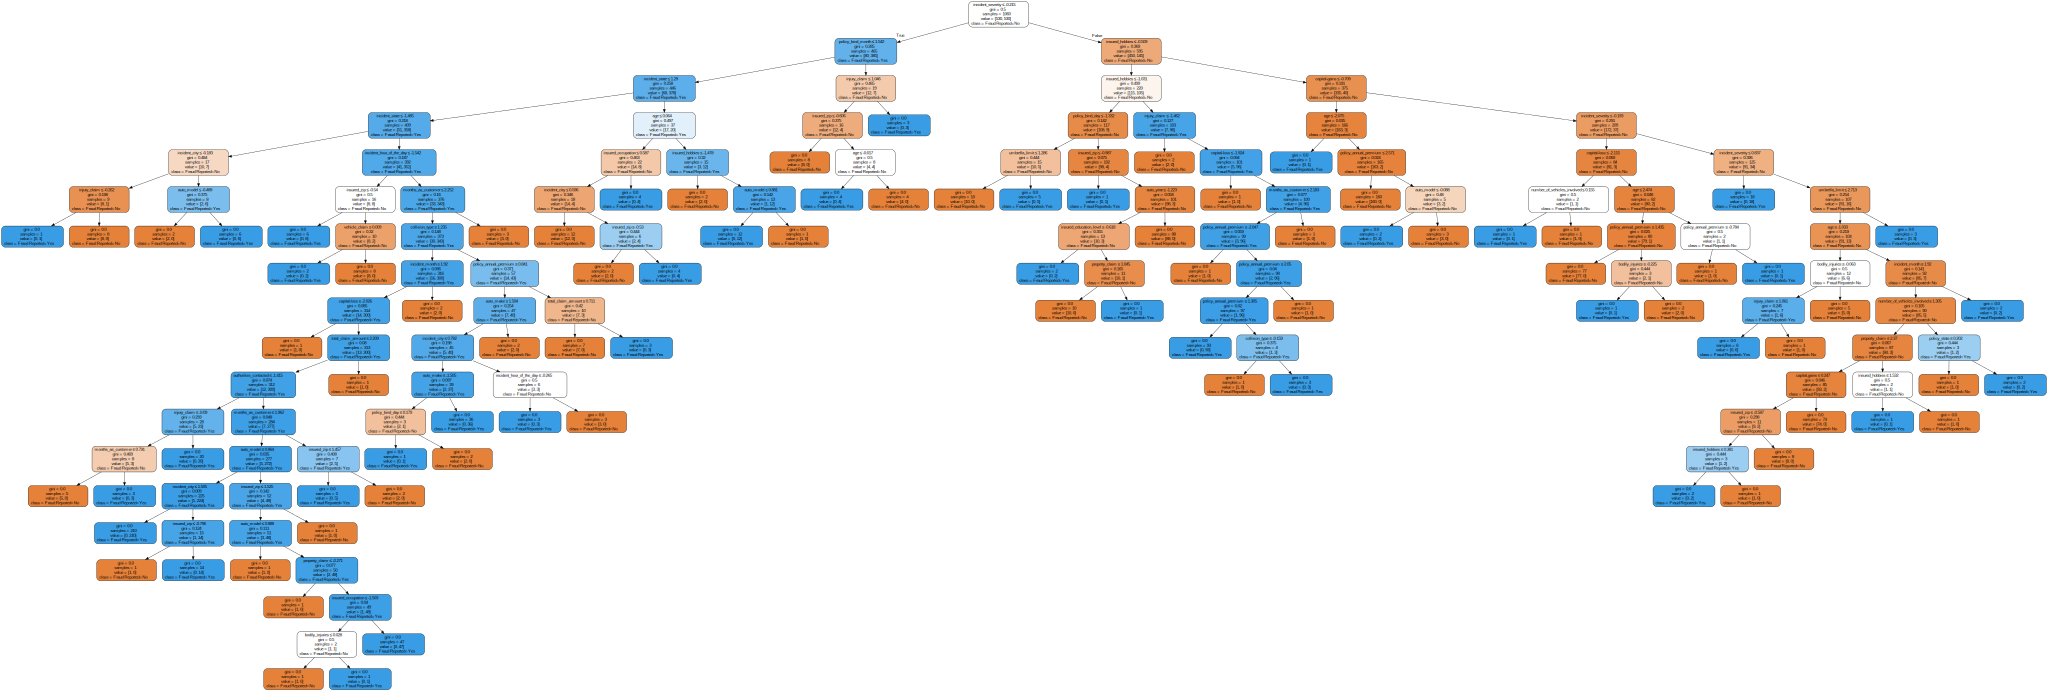

In [107]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=insurance_claims_fct_X.columns, 
                            class_names=['Fraud Reported=No', 'Fraud Reported=Yes'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

### <a id='f3_ID'> 6.3 Naive Bayes </a> 

The Gaussian Naive Bayes classification model was used.

In [276]:
from sklearn.naive_bayes import GaussianNB

#### With Recursive Feature Elimination

In [277]:
nb_rfe = GaussianNB()

In [278]:
# Fit the model
nb_rfe.fit(X_train_rfe, y_train_smote)

GaussianNB(priors=None)

##### Cross-Validation Scores for Training Set

In [279]:
# Accuracy
print(cross_val_score(nb_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.7198113207547169


In [280]:
# Precision
print(cross_val_score(nb_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.6866597666391012


In [281]:
# Recall
print(cross_val_score(nb_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.809433962264151


In [282]:
# F1 Score
print(cross_val_score(nb_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.742407754805371


In [283]:
# AUC
print(cross_val_score(nb_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7922748309006764


##### Predictions on Test Set

In [284]:
y_pred_rfe = nb_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], d

##### Confusion Matrix

In [285]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[133  90]
 [ 17  60]]


In [286]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[133,  90],
       [ 17,  60]], dtype=int64)

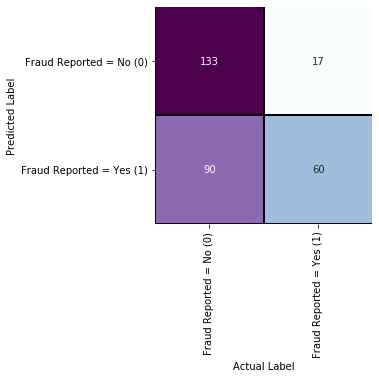

In [287]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [288]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 60
True Negative: 133
False Positive: 90
False Negative: 17


##### Evaluation of Model

In [289]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.6433333333333333


In [290]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.3566666666666667


In [291]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.4


In [292]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.7792207792207793


In [293]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5286343612334802


In [294]:
# Specificity
print(TN / float(TN + FP))

0.5964125560538116


In [295]:
# False Positive Rate
print(FP / float(TN + FP))

0.40358744394618834


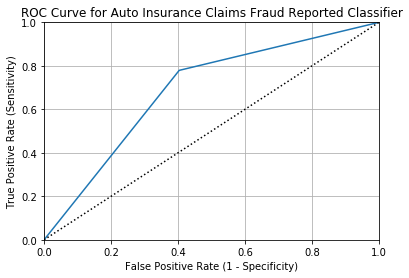

In [296]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [297]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.6878166676372954


In [298]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.89      0.60      0.71       223
Fraud Reported = Yes (1)       0.40      0.78      0.53        77

             avg / total       0.76      0.64      0.67       300



#### With PCA

In [299]:
nb_pca = GaussianNB()

In [300]:
# Fit the model
nb_pca.fit(X_train_pca, y_train_smote)

GaussianNB(priors=None)

##### Cross-Validation Scores for Training Set

In [301]:
# Accuracy
print(cross_val_score(nb_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.6981132075471697


In [302]:
# Precision
print(cross_val_score(nb_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.6744592390620602


In [320]:
# Recall
print(cross_val_score(nb_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.7566037735849057


In [303]:
# F1 Score
print(cross_val_score(nb_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.7111947085481828


In [304]:
# AUC
print(cross_val_score(nb_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7718049127803488


##### Predictions on Test Set

In [305]:
y_pred_pca = nb_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], d

##### Confusion Matrix

In [306]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[149  74]
 [ 33  44]]


In [307]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[149,  74],
       [ 33,  44]], dtype=int64)

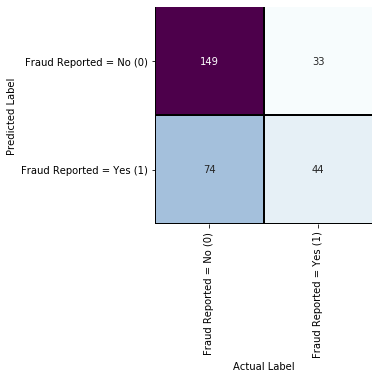

In [308]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [309]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 44
True Negative: 149
False Positive: 74
False Negative: 33


##### Evaluation of Model

In [310]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.6433333333333333


In [311]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.3566666666666667


In [312]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.3728813559322034


In [313]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.5714285714285714


In [314]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.4512820512820513


In [315]:
# Specificity
print(TN / float(TN + FP))

0.6681614349775785


In [316]:
# False Positive Rate
print(FP / float(TN + FP))

0.33183856502242154


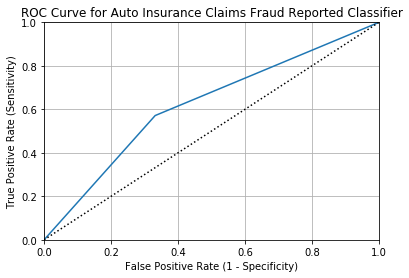

In [317]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [318]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.6197950032030749


In [319]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.82      0.67      0.74       223
Fraud Reported = Yes (1)       0.37      0.57      0.45        77

             avg / total       0.70      0.64      0.66       300



#### Without RFE or PCA

In [321]:
nb = GaussianNB()

In [322]:
# Fit the model
nb.fit(X_train_sc_smote, y_train_smote)

GaussianNB(priors=None)

##### Cross-Validation Scores for Training Set

In [323]:
# Accuracy
print(cross_val_score(nb, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.7179245283018868


In [324]:
# Precision
print(cross_val_score(nb, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.668761461378985


In [325]:
# Recall
print(cross_val_score(nb, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.8603773584905661


In [326]:
# F1 Score
print(cross_val_score(nb, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.7517719663175655


In [327]:
# AUC
print(cross_val_score(nb, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.824065503737985


##### Predictions on Test Set

In [328]:
y_pred = nb.predict(X_test_sc)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1], d

##### Confusion Matrix

In [329]:
print(metrics.confusion_matrix(y_test, y_pred))

[[126  97]
 [ 23  54]]


In [330]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[126,  97],
       [ 23,  54]], dtype=int64)

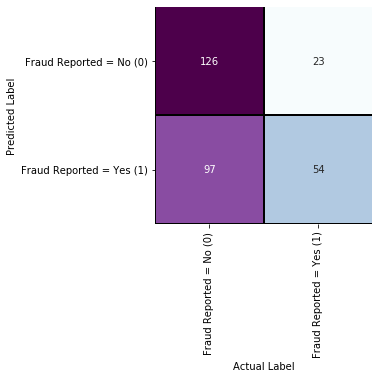

In [331]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [332]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 54
True Negative: 126
False Positive: 97
False Negative: 23


##### Evaluation of Model

In [333]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.6


In [334]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.4


In [335]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.3576158940397351


In [336]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.7012987012987013


In [337]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.4736842105263157


In [338]:
# Specificity
print(TN / float(TN + FP))

0.5650224215246636


In [339]:
# False Positive Rate
print(FP / float(TN + FP))

0.4349775784753363


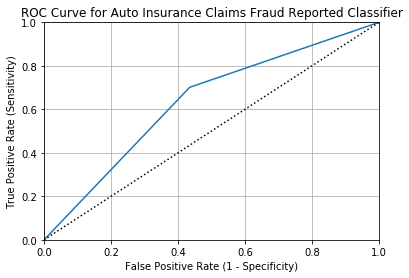

In [340]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [341]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.6331605614116825


In [342]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.89      0.60      0.71       223
Fraud Reported = Yes (1)       0.40      0.78      0.53        77

             avg / total       0.76      0.64      0.67       300



### <a id='f4_ID'> 6.4 k-Nearest Neighbours (KNN) </a>

The optimal number of K, the number of neighbours, found was 2 for training with RFE, with PCA and without RFE or PCA.

In [343]:
from sklearn.neighbors import KNeighborsClassifier

#### With RFE

In [344]:
# Search for optimal value of K for KNN
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_rfe, y_train_smote, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8264150943396228, 0.8358490566037737, 0.7877358490566039, 0.809433962264151, 0.7641509433962265, 0.7830188679245282, 0.7603773584905661, 0.7773584905660378, 0.7622641509433963]


Text(0, 0.5, 'Cross-Validated Accuracy')

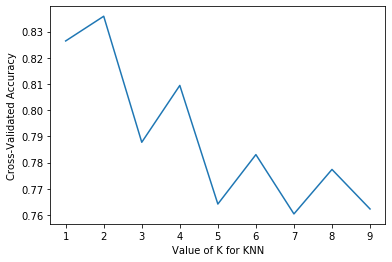

In [345]:
# Cross-validated accuracy for K value of KNN
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Therefore, the optimal value of K that would be used for KNN is 2.

In [346]:
knn_rfe = KNeighborsClassifier(n_neighbors=2)

In [347]:
# Fit the model
knn_rfe.fit(X_train_rfe, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

##### Cross-Validation Scores for Training Set

In [348]:
# Accuracy
print(cross_val_score(knn_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.8358490566037737


In [349]:
# Precision
print(cross_val_score(knn_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.8019390284065506


In [350]:
# Recall
print(cross_val_score(knn_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.8924528301886794


In [351]:
# F1 Score
print(cross_val_score(knn_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.8440163366095577


In [352]:
# AUC
print(cross_val_score(knn_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.8570487718049128


##### Predictions on Test Set

In [353]:
y_pred_rfe = knn_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], d

##### Confusion Matrix

In [354]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[179  44]
 [ 52  25]]


In [355]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[179,  44],
       [ 52,  25]], dtype=int64)

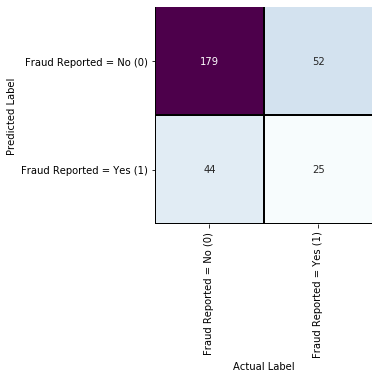

In [356]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [357]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 25
True Negative: 179
False Positive: 44
False Negative: 52


##### Evaluation of Model

In [358]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.68


In [359]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.31999999999999995


In [360]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.36231884057971014


In [361]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.3246753246753247


In [362]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.3424657534246575


In [363]:
# Specificity
print(TN / float(TN + FP))

0.8026905829596412


In [364]:
# False Positive Rate
print(FP / float(TN + FP))

0.19730941704035873


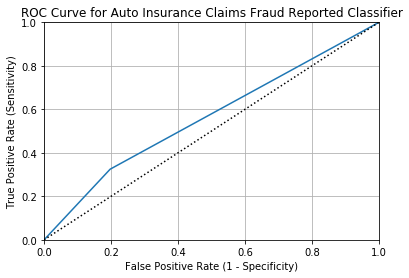

In [365]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [366]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.563682953817483


In [367]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.77      0.80      0.79       223
Fraud Reported = Yes (1)       0.36      0.32      0.34        77

             avg / total       0.67      0.68      0.67       300



#### With PCA

In [368]:
# Search for optimal value of K for KNN
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train_smote, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8235849056603775, 0.881132075471698, 0.7839622641509434, 0.8188679245283019, 0.7537735849056604, 0.779245283018868, 0.7339622641509433, 0.7566037735849058, 0.7330188679245283]


Text(0, 0.5, 'Cross-Validated Accuracy')

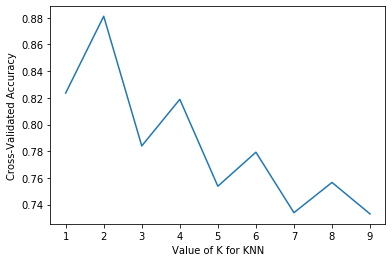

In [369]:
# Cross-validated accuracy for K value of KNN
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Therefore, the optimal value of K that would be used for KNN is 2.

In [370]:
knn_pca = KNeighborsClassifier(n_neighbors=2)

In [371]:
# Fit the model
knn_pca.fit(X_train_pca, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

##### Cross-Validation Scores for Training Set

In [372]:
# Accuracy
print(cross_val_score(knn_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.881132075471698


In [373]:
# Precision
print(cross_val_score(knn_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.83319180428962


In [374]:
# Recall
print(cross_val_score(knn_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.9528301886792454


In [375]:
# F1 Score
print(cross_val_score(knn_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.8886512533543869


In [376]:
# AUC
print(cross_val_score(knn_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.8885012459950161


##### Predictions on Test Set

In [377]:
y_pred_pca = knn_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], d

##### Confusion Matrix

In [380]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[167  56]
 [ 61  16]]


In [381]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[167,  56],
       [ 61,  16]], dtype=int64)

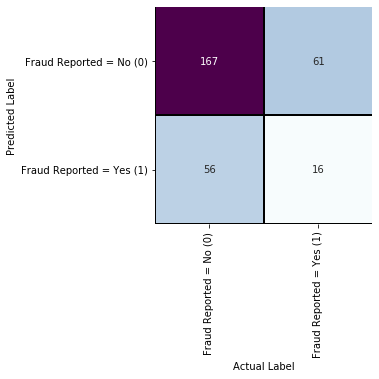

In [382]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [383]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 16
True Negative: 167
False Positive: 56
False Negative: 61


##### Evaluation of Model

In [384]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.61


In [385]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.39


In [386]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.2222222222222222


In [387]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.2077922077922078


In [388]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.21476510067114093


In [389]:
# Specificity
print(TN / float(TN + FP))

0.7488789237668162


In [390]:
# False Positive Rate
print(FP / float(TN + FP))

0.25112107623318386


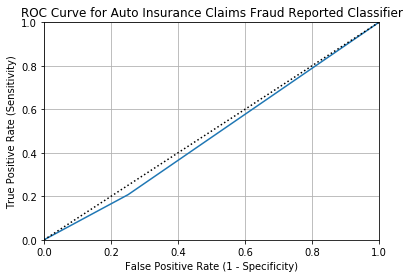

In [391]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [392]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.478335565779512


In [393]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.73      0.75      0.74       223
Fraud Reported = Yes (1)       0.22      0.21      0.21        77

             avg / total       0.60      0.61      0.61       300



#### Without RFE or PCA

In [394]:
# Search for optimal value of K for KNN
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7405660377358492, 0.7877358490566039, 0.6830188679245283, 0.719811320754717, 0.6509433962264151, 0.6669811320754717, 0.619811320754717, 0.6528301886792451, 0.6141509433962263]


Text(0, 0.5, 'Cross-Validated Accuracy')

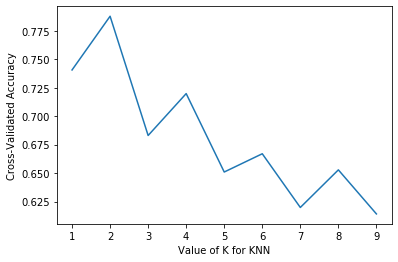

In [395]:
# Cross-validated accuracy for K value of KNN
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Therefore, the optimal value of K that would be used for KNN is 2.

In [396]:
knn = KNeighborsClassifier(n_neighbors=2)

In [397]:
# Fit the model
knn.fit(X_train_sc_smote, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

##### Cross-Validation Scores for Training Set

In [398]:
# Accuracy
print(cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.7877358490566039


In [399]:
# Precision
print(cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.7129723936052107


In [400]:
# Recall
print(cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.9641509433962264


In [401]:
# F1 Score
print(cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.819484646990483


In [402]:
# AUC
print(cross_val_score(knn, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.7902990388038447


##### Predictions on Test Set

In [403]:
y_pred = knn.predict(X_test_sc)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], d

##### Confusion Matrix

In [404]:
print(metrics.confusion_matrix(y_test, y_pred))

[[133  90]
 [ 41  36]]


In [405]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[133,  90],
       [ 41,  36]], dtype=int64)

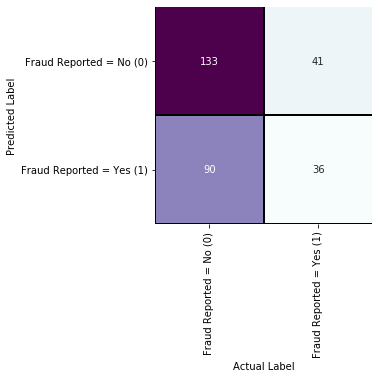

In [406]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [407]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 36
True Negative: 133
False Positive: 90
False Negative: 41


##### Evaluation of Model

In [408]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.5633333333333334


In [409]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.43666666666666665


In [410]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.2857142857142857


In [411]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.4675324675324675


In [412]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.354679802955665


In [413]:
# Specificity
print(TN / float(TN + FP))

0.5964125560538116


In [414]:
# False Positive Rate
print(FP / float(TN + FP))

0.40358744394618834


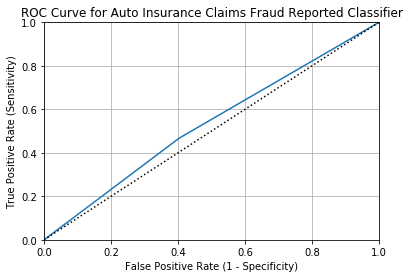

In [415]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [416]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.5319725117931395


In [417]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.76      0.60      0.67       223
Fraud Reported = Yes (1)       0.29      0.47      0.35        77

             avg / total       0.64      0.56      0.59       300



### <a id='f5_ID'> 6.5 Random Forest </a>

The number of decision trees used was set to 500, which resulted in better model performance.

In [418]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\sanje\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### With RFE

In [419]:
rf_rfe = RandomForestClassifier(n_estimators=500, random_state=123)

In [420]:
rf_rfe.fit(X_train_rfe, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [421]:
# Accuracy
print(cross_val_score(rf_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.8896226415094339


In [422]:
# Precision
print(cross_val_score(rf_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.8756295446177453


In [423]:
# Recall
print(cross_val_score(rf_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.9113207547169813


In [424]:
# F1 Score
print(cross_val_score(rf_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.8897592194121616


In [425]:
# AUC
print(cross_val_score(rf_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9584015663937345


##### Predictions on Test Set

In [426]:
y_pred_rfe = rf_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], d

##### Confusion Matrix

In [427]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[196  27]
 [ 30  47]]


In [428]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[196,  27],
       [ 30,  47]], dtype=int64)

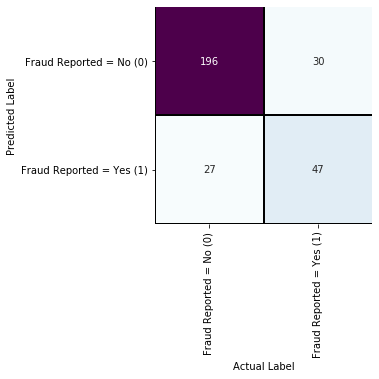

In [429]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [430]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 47
True Negative: 196
False Positive: 27
False Negative: 30


##### Evaluation of Model

In [431]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.81


In [434]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.18999999999999995


In [435]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.6351351351351351


In [436]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.6103896103896104


In [437]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.6225165562913907


In [438]:
# Specificity
print(TN / float(TN + FP))

0.8789237668161435


In [439]:
# False Positive Rate
print(FP / float(TN + FP))

0.1210762331838565


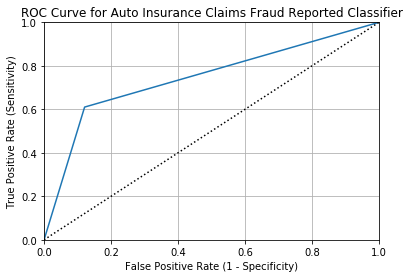

In [440]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [441]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.7446566886028769


In [442]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.87      0.88      0.87       223
Fraud Reported = Yes (1)       0.64      0.61      0.62        77

             avg / total       0.81      0.81      0.81       300



#### With PCA

In [443]:
rf_pca = RandomForestClassifier(n_estimators=500, random_state=123)

In [444]:
# Fit the model
rf_pca.fit(X_train_pca, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [445]:
# Accuracy
print(cross_val_score(rf_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.8632075471698114


In [446]:
# Precision
print(cross_val_score(rf_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.8368742471711567


In [447]:
# Recall
print(cross_val_score(rf_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.9018867924528303


In [448]:
# F1 Score
print(cross_val_score(rf_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.8664486494730556


In [449]:
# AUC
print(cross_val_score(rf_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9436098255606978


##### Predictions on Test Set

In [450]:
y_pred_pca = rf_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], d

##### Confusion Matrix

In [451]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[189  34]
 [ 59  18]]


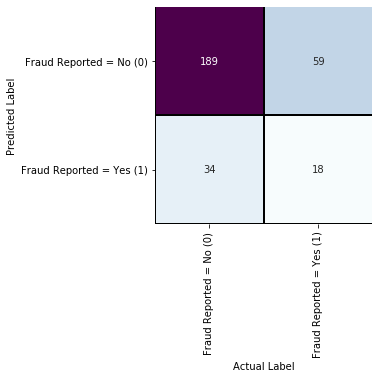

In [452]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [453]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 18
True Negative: 189
False Positive: 34
False Negative: 59


##### Evaluation of Model

In [454]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.69


In [455]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.31000000000000005


In [456]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.34615384615384615


In [457]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.23376623376623376


In [458]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.27906976744186046


In [459]:
# Specificity
print(TN / float(TN + FP))

0.8475336322869955


In [460]:
# False Positive Rate
print(FP / float(TN + FP))

0.15246636771300448


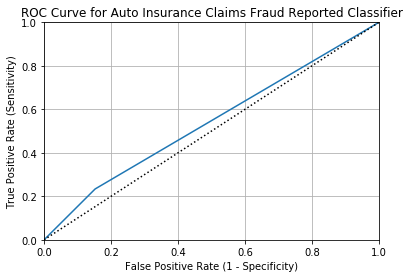

In [461]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [462]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.5406499330266147


In [463]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.76      0.85      0.80       223
Fraud Reported = Yes (1)       0.35      0.23      0.28        77

             avg / total       0.66      0.69      0.67       300



#### Without RFE or PCA

In [464]:
rf = RandomForestClassifier(n_estimators=500, random_state=123)

In [465]:
# Fit the model
rf.fit(X_train_sc_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

##### Cross-Validation Scores for Training Set

In [466]:
# Accuracy
print(cross_val_score(rf, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.8877358490566039


In [467]:
# Precision
print(cross_val_score(rf, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.8961490067319261


In [468]:
# Recall
print(cross_val_score(rf, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.881132075471698


In [469]:
# F1 Score
print(cross_val_score(rf, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.8797102588995662


In [470]:
# AUC
print(cross_val_score(rf, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9720897116411533


##### Predictions on Test Set

In [471]:
y_pred = rf.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], d

##### Confusion Matrix

In [472]:
print(metrics.confusion_matrix(y_test, y_pred))

[[203  20]
 [ 41  36]]


In [473]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[203,  20],
       [ 41,  36]], dtype=int64)

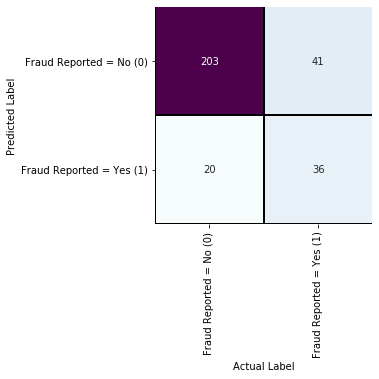

In [474]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [475]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 36
True Negative: 203
False Positive: 20
False Negative: 41


##### Evaluation of Model

In [476]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7966666666666666


In [477]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.20333333333333337


In [478]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.6428571428571429


In [479]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.4675324675324675


In [480]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5413533834586466


In [481]:
# Specificity
print(TN / float(TN + FP))

0.9103139013452914


In [482]:
# False Positive Rate
print(FP / float(TN + FP))

0.08968609865470852


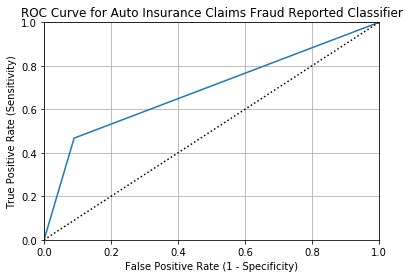

In [483]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [484]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.6889231844388795


In [485]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.87      0.88      0.87       223
Fraud Reported = Yes (1)       0.64      0.61      0.62        77

             avg / total       0.81      0.81      0.81       300



### <a id='f6_ID'> 6.6 Support Vector Machine (SVM) Classifier </a> 

The kernel parameter was set to 'rbf' (radial basis function) and C (regualrization parameter) was 1.0.

In [486]:
from sklearn.svm import SVC

#### With RFE

In [487]:
svc_rfe = SVC(kernel = 'rbf', C=1.0, random_state = 123)

In [488]:
svc_rfe.fit(X_train_rfe, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

##### Cross-Validation Scores for Training Set

In [489]:
# Accuracy
print(cross_val_score(svc_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.7962264150943396


In [490]:
# Precision
print(cross_val_score(svc_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.7835201720434701


In [491]:
# Recall
print(cross_val_score(svc_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.8188679245283019


In [492]:
# F1 Score
print(cross_val_score(svc_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.799035095869848


In [493]:
# AUC
print(cross_val_score(svc_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.8761836952652189


In [494]:
print(svc_rfe.support_vectors_)
print(svc_rfe.support_)
svc_rfe.n_support_ 

[[ 0.77350548  1.06607944 -1.22267102 ... -0.82429719 -1.43059645
  -1.85483204]
 [-0.67064814 -0.99210848  1.20532817 ... -0.82429719  1.03006043
   0.60996641]
 [-0.8868388  -0.66713144 -0.00867143 ... -0.82429719  1.10400338
   1.02624583]
 ...
 [ 1.36847688  1.60912342 -1.22267102 ... -0.82429719  0.64205788
  -0.03943214]
 [ 0.7955416   0.75542677  0.74715086 ...  1.50471043  0.24215192
   0.1115179 ]
 [ 1.94798807  1.9375257  -0.11040229 ... -0.82429719 -1.42456084
  -1.03283389]]
[   0    1    3    4    7    8    9   11   12   13   16   21   23   24
   26   27   28   30   31   33   39   42   44   46   48   51   57   59
   61   64   67   69   70   71   73   75   76   77   78   81   82   86
   87   90   93  100  102  104  109  110  111  113  114  117  118  120
  123  125  128  130  131  133  135  136  137  140  142  143  146  147
  150  155  157  162  164  165  166  167  168  170  173  174  176  177
  178  179  180  181  184  185  189  190  191  192  194  196  198  202
  204  205 

array([331, 319])

##### Predictions on Test Set

In [495]:
y_pred_rfe = svc_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], d

##### Confusion Matrix

In [496]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[165  58]
 [ 30  47]]


In [497]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[165,  58],
       [ 30,  47]], dtype=int64)

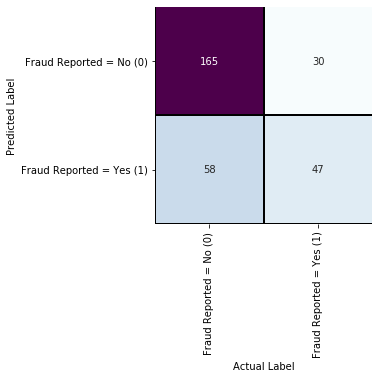

In [498]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [499]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 47
True Negative: 165
False Positive: 58
False Negative: 30


##### Evaluation of Model

In [500]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.7066666666666667


In [503]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.29333333333333333


In [504]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.44761904761904764


In [505]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.6103896103896104


In [506]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5164835164835164


In [507]:
# Specificity
print(TN / float(TN + FP))

0.7399103139013453


In [508]:
# False Positive Rate
print(FP / float(TN + FP))

0.2600896860986547


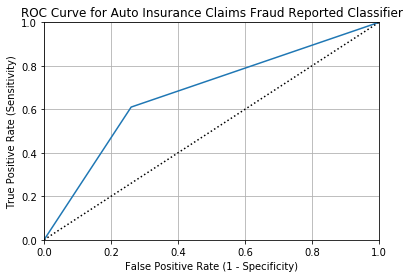

In [509]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [510]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.6751499621454778


In [511]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.85      0.74      0.79       223
Fraud Reported = Yes (1)       0.45      0.61      0.52        77

             avg / total       0.74      0.71      0.72       300



#### With PCA

In [512]:
svc_pca = SVC(kernel = 'rbf', C=1.0, random_state = 123)

In [513]:
# Fit the model
svc_pca.fit(X_train_pca, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

##### Cross-Validation Scores for Training Set

In [514]:
# Accuracy
print(cross_val_score(svc_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.8509433962264152


In [515]:
# Precision
print(cross_val_score(svc_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.8138479548723433


In [516]:
# Recall
print(cross_val_score(svc_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.9075471698113209


In [517]:
# F1 Score
print(cross_val_score(svc_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.8574679354308623


In [518]:
# AUC
print(cross_val_score(svc_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9340690637237451


In [519]:
print(svc_pca.support_vectors_)
print(svc_pca.support_)
svc_pca.n_support_ 

[[-3.85475955e-01 -2.74018625e-01 -1.90729578e+00 ...  5.42171292e-01
   5.50985463e-01 -2.62042609e-01]
 [-7.49047882e-01 -5.66857165e-01 -1.34012339e+00 ...  6.10409211e-01
   1.30550210e+00  2.62623119e-01]
 [-8.05379219e-02 -3.59957716e-01 -1.80615320e+00 ... -7.11843971e-01
  -1.76523147e+00 -3.91623350e-01]
 ...
 [-5.18652006e-01 -1.80037984e-04 -1.91696308e+00 ...  6.38909751e-01
  -6.99876461e-01  8.17613044e-01]
 [-1.35757426e+00  1.23322383e+00  9.09582579e-01 ... -5.76040383e-01
   4.51375268e-01 -5.22513970e-01]
 [ 2.77254305e+00  3.06953842e+00  6.02765034e-01 ...  4.81002376e-02
   1.59826034e-01  2.45112293e-01]]
[   1    3    4    6    7    8    9   11   12   13   15   16   17   20
   21   24   25   26   27   28   29   30   33   36   39   43   44   45
   46   47   48   51   55   56   57   59   61   62   64   67   68   69
   70   71   73   75   76   77   78   79   80   81   82   86   87   88
   89   92   93   95   96  100  102  104  109  110  111  113  114  117
  118  12

array([403, 369])

##### Predictions on Test Set

In [520]:
y_pred_pca = svc_pca.predict(X_test_pca)
y_pred_pca

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], d

##### Confusion Matrix

In [521]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[177  46]
 [ 53  24]]


In [522]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[177,  46],
       [ 53,  24]], dtype=int64)

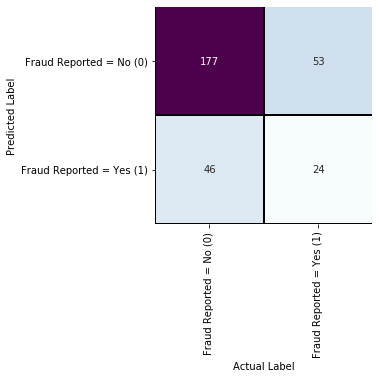

In [523]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [524]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 24
True Negative: 177
False Positive: 46
False Negative: 53


##### Evaluation of Model

In [525]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.67


In [526]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.32999999999999996


In [527]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.34285714285714286


In [528]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.3116883116883117


In [529]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.32653061224489793


In [530]:
# Specificity
print(TN / float(TN + FP))

0.7937219730941704


In [531]:
# False Positive Rate
print(FP / float(TN + FP))

0.2062780269058296


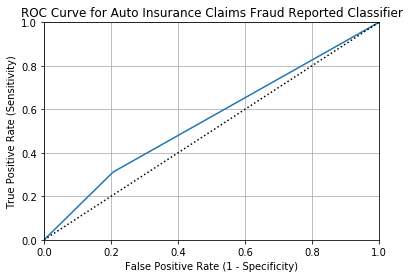

In [532]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [533]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.5527051423912411


In [534]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.77      0.79      0.78       223
Fraud Reported = Yes (1)       0.34      0.31      0.33        77

             avg / total       0.66      0.67      0.66       300



PCA does not perform well on this dataset.

#### Without RFE or PCA

In [535]:
svc = SVC(kernel = 'rbf', C=1.0, random_state = 123)

In [536]:
# Fit the model
svc.fit(X_train_sc_smote, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

##### Cross-Validation Scores for Training Set

In [537]:
# Accuracy
print(cross_val_score(svc, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.8877358490566039


In [538]:
# Precision
print(cross_val_score(svc, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.8782588243321923


In [539]:
# Recall
print(cross_val_score(svc, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.9018867924528303


In [540]:
# F1 Score
print(cross_val_score(svc, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.8857886877071458


In [541]:
# AUC
print(cross_val_score(svc, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9567817728729086


In [542]:
print(svc.support_vectors_)
print(svc.support_)
svc.n_support_ 

[[-0.67064814 -0.99210848  1.20532817 ... -0.50434227 -0.95174376
  -0.57732421]
 [-0.8868388  -0.66713144 -0.00867143 ...  0.74918759 -0.95174376
   0.69533437]
 [-0.51499086 -0.77545712  1.20532817 ... -1.07412858  0.96268334
  -0.69302045]
 ...
 [-0.48970839 -0.95668931 -0.17208324 ... -1.49927892  0.96268334
  -0.20797982]
 [-0.94071435 -0.95044621 -0.24212472 ...  1.52497432 -0.95174376
   1.76330273]
 [ 1.94798807  1.9375257  -0.11040229 ...  0.97264519  0.96268334
   0.21832938]]
[   1    3    4    6    7    8    9   11   12   13   16   20   21   23
   24   25   27   28   30   31   33   34   39   42   43   44   45   46
   47   48   55   57   59   61   62   64   67   68   70   73   75   76
   77   78   81   82   86   87   92   93   96  100  102  104  109  110
  111  113  114  117  118  120  123  130  131  133  135  136  137  140
  141  143  144  146  147  148  155  157  162  164  165  166  167  168
  170  174  176  177  178  179  180  181  184  185  189  190  191  192
  194  195 

array([364, 323])

##### Predictions on Test Set

In [543]:
y_pred = svc.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], d

##### Confusion Matrix

In [544]:
print(metrics.confusion_matrix(y_test, y_pred))

[[188  35]
 [ 56  21]]


In [545]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[188,  35],
       [ 56,  21]], dtype=int64)

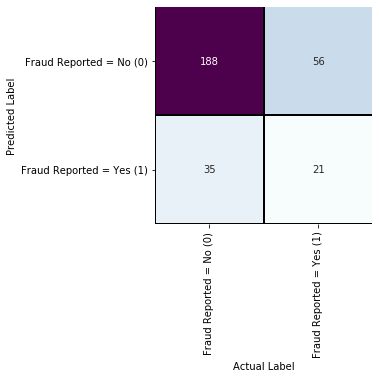

In [546]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [547]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 21
True Negative: 188
False Positive: 35
False Negative: 56


##### Evaluation of Model

In [548]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.6966666666666667


In [551]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.30333333333333334


In [552]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.375


In [553]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.2727272727272727


In [554]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.3157894736842105


In [555]:
# Specificity
print(TN / float(TN + FP))

0.8430493273542601


In [556]:
# False Positive Rate
print(FP / float(TN + FP))

0.15695067264573992


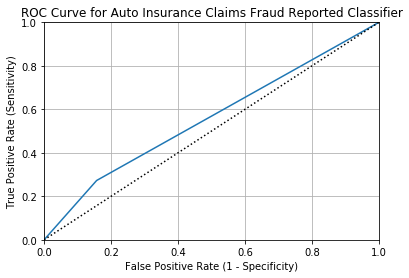

In [557]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [558]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.5578883000407664


In [559]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.85      0.74      0.79       223
Fraud Reported = Yes (1)       0.45      0.61      0.52        77

             avg / total       0.74      0.71      0.72       300



### <a id='f7_ID'> 6.7 Multilayer Perceptron (MLP) </a>

The solver parameter was set to 'adam' because 'lbfgs' works well with smaller datasets and 'adam' works well on larger datasets. The activation's default was 'relu', alpha was set to 1e-5, and hidden layers with (100, 50) showed better model performance.

In [560]:
from sklearn.neural_network import MLPClassifier

#### With RFE

In [636]:
mlp_rfe = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50), random_state=123)

In [637]:
# Fit the model
mlp_rfe.fit(X_train_rfe, y_train_smote)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Cross-Validation Scores for Training Set

In [638]:
# Accuracy
print(cross_val_score(mlp_rfe, X_train_rfe, y_train_smote, cv=10, scoring='accuracy').mean())

0.8773584905660377


In [639]:
# Precision
print(cross_val_score(mlp_rfe, X_train_rfe, y_train_smote, cv=10, scoring='precision').mean())

0.847214522358164


In [640]:
# Recall
print(cross_val_score(mlp_rfe, X_train_rfe, y_train_smote, cv=10, scoring='recall').mean())

0.9245283018867925


In [641]:
# F1 Score
print(cross_val_score(mlp_rfe, X_train_rfe, y_train_smote, cv=10, scoring='f1').mean())

0.8817970776736317


In [642]:
# AUC
print(cross_val_score(mlp_rfe, X_train_rfe, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9299394802420791


##### Predictions on Test Set

In [643]:
y_pred_rfe = mlp_rfe.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], d

In [644]:
# Model parameters
[coef.shape for coef in mlp_rfe.coefs_]

[(13, 100), (100, 50), (50, 1)]

In [645]:
 mlp_rfe.coefs_

[array([[ 0.10442974, -0.05748787, -0.16218545, ..., -0.03575246,
         -0.22841131, -0.03302579],
        [ 0.17919088,  0.16753262, -0.26543636, ...,  0.22016175,
         -0.09517303, -0.20451256],
        [ 0.1440455 , -0.34104589,  0.09721077, ...,  0.34426726,
         -0.3718986 ,  0.02508543],
        ...,
        [-0.36222721,  0.01923178,  0.07935448, ..., -0.31967016,
          0.17833888, -0.15684611],
        [-0.23921851, -0.01658885,  0.01678157, ...,  0.18468977,
          0.31557218, -0.14203343],
        [ 0.16917798,  0.12079902,  0.29059142, ..., -0.15835241,
         -0.01773239,  0.16366439]]),
 array([[ 0.26294742,  0.36968047, -0.33869599, ..., -0.02868292,
          0.16139313,  0.3988664 ],
        [-0.09004986,  0.04798588,  0.0849638 , ..., -0.27071078,
          0.34244759, -0.01778868],
        [-0.08016918, -0.30745829,  0.25454015, ..., -0.1058727 ,
         -0.39680437, -0.23317191],
        ...,
        [ 0.29449532,  0.14847129, -0.2496641 , ..., -

##### Evaluation of Model

###### Confusion Matrix

In [646]:
print(metrics.confusion_matrix(y_test, y_pred_rfe))

[[191  32]
 [ 39  38]]


In [647]:
confmat = metrics.confusion_matrix(y_test, y_pred_rfe)
confmat

array([[191,  32],
       [ 39,  38]], dtype=int64)

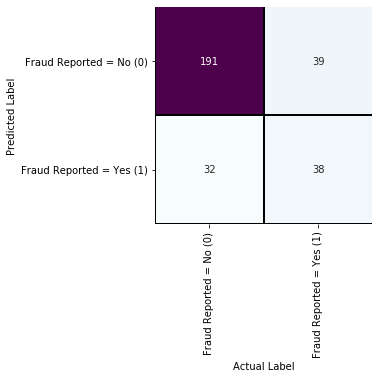

In [648]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [649]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 38
True Negative: 191
False Positive: 32
False Negative: 39


###### Evaluation of Model

In [650]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_rfe))

0.7633333333333333


In [651]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_rfe))

0.2366666666666667


In [652]:
# Precision
precision = metrics.precision_score(y_test, y_pred_rfe)
print(precision)

0.5428571428571428


In [653]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rfe)
print(recall)

0.4935064935064935


In [654]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.5170068027210883


In [655]:
# Specificity
print(TN / float(TN + FP))

0.8565022421524664


In [656]:
# False Positive Rate
print(FP / float(TN + FP))

0.14349775784753363


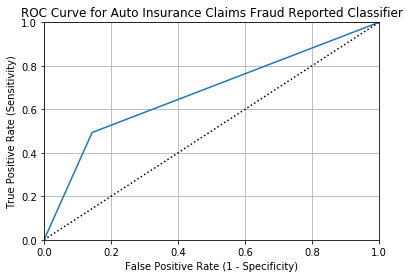

In [657]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [658]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_rfe))

0.6750043678294799


In [659]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.83      0.86      0.84       223
Fraud Reported = Yes (1)       0.54      0.49      0.52        77

             avg / total       0.76      0.76      0.76       300



#### With PCA

In [660]:
mlp_pca = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50), random_state=123)

In [661]:
# Fit the model
mlp_pca.fit(X_train_pca, y_train_smote)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Cross-Validation Scores for Training Set

In [662]:
# Accuracy
print(cross_val_score(mlp_pca, X_train_pca, y_train_smote, cv=10, scoring='accuracy').mean())

0.8603773584905661


In [663]:
# Precision
print(cross_val_score(mlp_pca, X_train_pca, y_train_smote, cv=10, scoring='precision').mean())

0.8089660515837573


In [664]:
# Recall
print(cross_val_score(mlp_pca, X_train_pca, y_train_smote, cv=10, scoring='recall').mean())

0.9433962264150942


In [665]:
# F1 Score
print(cross_val_score(mlp_pca, X_train_pca, y_train_smote, cv=10, scoring='f1').mean())

0.8700933161969742


In [666]:
# AUC
print(cross_val_score(mlp_pca, X_train_pca, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9126735493058028


##### Predictions on Test Set

In [667]:
y_pred_pca = mlp_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], d

In [668]:
# Model parameters
[coef.shape for coef in mlp_pca.coefs_]

[(20, 100), (100, 50), (50, 1)]

In [669]:
 mlp_pca.coefs_

[array([[ 0.0928518 , -0.14012913, -0.28730199, ..., -0.15826497,
         -0.10871611, -0.1343949 ],
        [ 0.04443793,  0.10449802, -0.23314575, ...,  0.32245473,
          0.00765588, -0.28903121],
        [ 0.16948029, -0.30643506,  0.0055724 , ...,  0.2501801 ,
         -0.13828228, -0.02077986],
        ...,
        [ 0.01026053, -0.01849446, -0.04200951, ...,  0.15815672,
          0.07701977,  0.18171923],
        [ 0.00541589,  0.14105686,  0.06153295, ...,  0.13642525,
         -0.44501574, -0.04685619],
        [-0.17592149, -0.16951353,  0.05598937, ..., -0.09641452,
          0.04960232, -0.24953157]]),
 array([[ 0.01981535, -0.23475276, -0.04852297, ...,  0.16469171,
          0.26771347, -0.13327791],
        [ 0.02383252, -0.12070778, -0.09299697, ..., -0.03279424,
          0.01834928, -0.34099606],
        [-0.1434344 ,  0.1863481 , -0.13805801, ...,  0.22320687,
          0.2102372 ,  0.09525409],
        ...,
        [ 0.27906199, -0.25509145, -0.1182824 , ...,  

##### Confusion Matrix

In [670]:
print(metrics.confusion_matrix(y_test, y_pred_pca))

[[176  47]
 [ 55  22]]


In [671]:
confmat = metrics.confusion_matrix(y_test, y_pred_pca)
confmat

array([[176,  47],
       [ 55,  22]], dtype=int64)

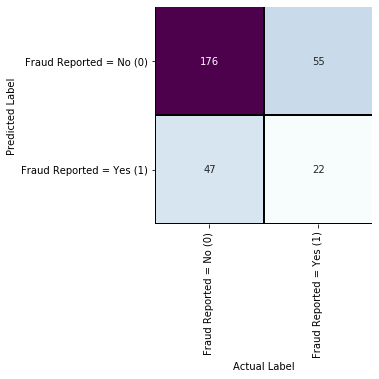

In [672]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [673]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 22
True Negative: 176
False Positive: 47
False Negative: 55


##### Evaluation of Model

In [674]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_pca))

0.66


In [675]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_pca))

0.33999999999999997


In [676]:
# Precision
precision = metrics.precision_score(y_test, y_pred_pca)
print(precision)

0.3188405797101449


In [677]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred_pca)
print(recall)

0.2857142857142857


In [678]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.3013698630136986


In [679]:
# Specificity
print(TN / float(TN + FP))

0.7892376681614349


In [680]:
# False Positive Rate
print(FP / float(TN + FP))

0.21076233183856502


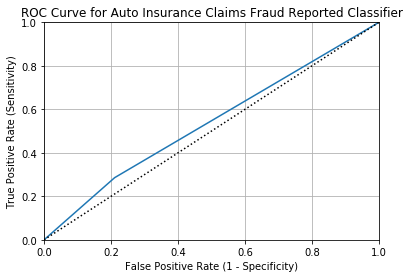

In [681]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [682]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_pca))

0.5374759769378603


In [683]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred_pca, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.76      0.79      0.78       223
Fraud Reported = Yes (1)       0.32      0.29      0.30        77

             avg / total       0.65      0.66      0.65       300



#### Without RFE or PCA

In [684]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50), random_state=123)

In [685]:
# Fit the model
mlp.fit(X_train_sc_smote, y_train_smote)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Cross-Validation Scores for Training Set

In [686]:
# Accuracy
print(cross_val_score(mlp, X_train_sc_smote, y_train_smote, cv=10, scoring='accuracy').mean())

0.9009433962264151


In [687]:
# Precision
print(cross_val_score(mlp, X_train_sc_smote, y_train_smote, cv=10, scoring='precision').mean())

0.8559953430436427


In [688]:
# Recall
print(cross_val_score(mlp, X_train_sc_smote, y_train_smote, cv=10, scoring='recall').mean())

0.9660377358490566


In [689]:
# F1 Score
print(cross_val_score(mlp, X_train_sc_smote, y_train_smote, cv=10, scoring='f1').mean())

0.9067023185780968


In [690]:
# AUC
print(cross_val_score(mlp, X_train_sc_smote, y_train_smote, cv=10, scoring='roc_auc').mean())

0.9642221431114276


##### Predictions on Test Set

In [691]:
y_pred = mlp.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0], d

In [692]:
# Model parameters
[coef.shape for coef in mlp.coefs_]

[(39, 100), (100, 50), (50, 1)]

In [693]:
 mlp.coefs_

[array([[ 0.16180091, -0.01220835, -0.05652416, ...,  0.00037908,
         -0.06617798, -0.1373272 ],
        [ 0.09408557,  0.08402732, -0.16232775, ...,  0.15079892,
          0.02864355, -0.18109133],
        [-0.03570836, -0.24128752,  0.08064002, ...,  0.22480827,
         -0.30630784,  0.04954602],
        ...,
        [-0.0385388 ,  0.05404957,  0.07961693, ...,  0.04811281,
         -0.15237552,  0.07163712],
        [-0.18845698,  0.00531983, -0.03284138, ...,  0.08358745,
         -0.12018868, -0.02979901],
        [ 0.10120833,  0.24897983, -0.18676892, ...,  0.05588595,
         -0.20860838, -0.11307213]]),
 array([[-0.20054721,  0.14506135, -0.07748811, ...,  0.01618113,
          0.13751606,  0.16902946],
        [ 0.03478291,  0.10230398,  0.10298568, ...,  0.10451413,
         -0.19764786, -0.05567464],
        [ 0.1091247 ,  0.0100944 , -0.21551161, ...,  0.07650219,
         -0.18460966,  0.08321315],
        ...,
        [ 0.04796889, -0.06845422,  0.09392917, ...,  

##### Confusion Matrix

In [694]:
print(metrics.confusion_matrix(y_test, y_pred))

[[181  42]
 [ 49  28]]


In [695]:
confmat = metrics.confusion_matrix(y_test, y_pred)
confmat

array([[181,  42],
       [ 49,  28]], dtype=int64)

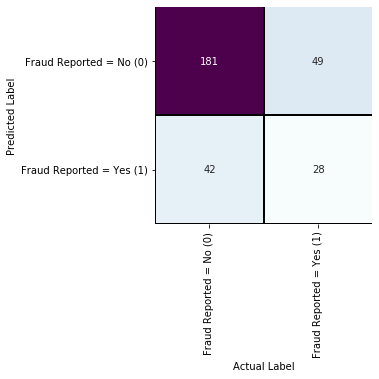

In [696]:
# Visualizing Confusion Matrix
faceLabels = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
sns.heatmap(confmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [697]:
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 28
True Negative: 181
False Positive: 42
False Negative: 49


##### Evaluation of Model

In [698]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.6966666666666667


In [701]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred))

0.30333333333333334


In [702]:
# Precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.4


In [703]:
# Recall (or Sensitivity)
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.36363636363636365


In [704]:
# F1 Score
print((2 * precision * recall) / (precision + recall))

0.380952380952381


In [705]:
# Specificity
print(TN / float(TN + FP))

0.8116591928251121


In [706]:
# False Positive Rate
print(FP / float(TN + FP))

0.18834080717488788


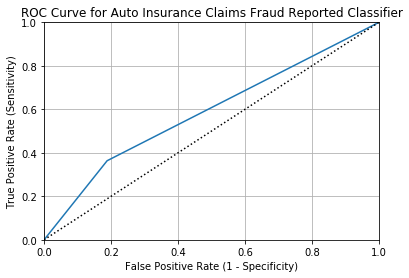

In [707]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Auto Insurance Claims Fraud Reported Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [708]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.587647778230738


In [709]:
# Classification Report
target_names = ['Fraud Reported = No (0)', 'Fraud Reported = Yes (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

 Fraud Reported = No (0)       0.79      0.81      0.80       223
Fraud Reported = Yes (1)       0.40      0.36      0.38        77

             avg / total       0.69      0.70      0.69       300

